<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP2/7506R_TP2_GRUPO24_BAYES_NAIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

  ➢ Torraca Lautaro - 108813

  
  ➢ Negrotti Gianluca - 108184

  ➢ Marco Tosi - 107237

In [74]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder



In [75]:
# subir archivo de train al colab (es muy pesado pasa subir a github)

train1 = pd.read_csv('https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP2/DataSets/train1.csv')
train2 = pd.read_csv('https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP2/DataSets/train2.csv')
train3 = pd.read_csv('https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP2/DataSets/train3.csv')
test = pd.read_csv('https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP2/DataSets/test.csv')

train_append = []

for i in [train1, train2, train3]:
  train_append.append(i)
train = pd.concat(train_append, ignore_index=True)
train = train.sort_values(by="ID").reset_index(drop=True).drop("ID", axis=1)



In [76]:
# Constantes
SEED=24
JOBS=-2

In [77]:
train.head()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [78]:
test.head()

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."


In [79]:
test.isna().sum()

ID           0
review_es    0
dtype: int64

### Bayes Naive

In [80]:
# X = train.copy()
# X = X.drop(["sentimiento"],  axis='columns', inplace=False)

# y = train['sentimiento'].copy()

# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.30,
#                                                     random_state=SEED,
#                                                     shuffle=True
#                                                     )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Matriz de confusión:


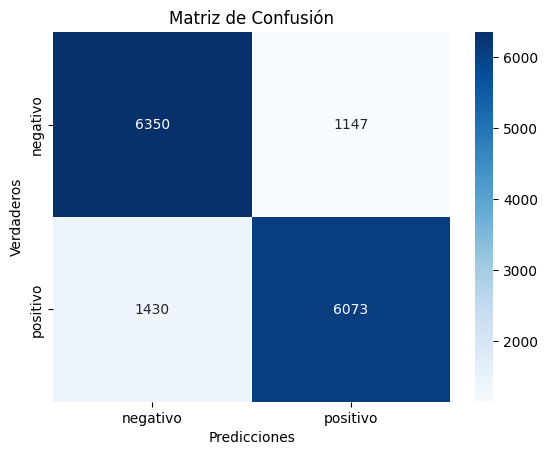


Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       0.82      0.85      0.83      7497
    positivo       0.84      0.81      0.82      7503

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000

Accuracy: 0.8282
Precision: 0.8411
Recall: 0.8094
F1 Score: 0.8250


In [81]:


# Descargar stopwords de NLTK
nltk.download('stopwords')

# Cargar stopwords en español
spanish_stopwords = stopwords.words('spanish')


# Convertir etiquetas a numéricas
label_encoder = LabelEncoder()
train['sentimiento'] = label_encoder.fit_transform(train['sentimiento'])

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    train['review_es'], train['sentimiento'], test_size=0.3, random_state=SEED)

# Crear un pipeline que vectorice los datos y luego aplique Naive Bayes
pipeline = make_pipeline(
    CountVectorizer(stop_words=spanish_stopwords, max_features=5000),
    MultinomialNB()
)

# Entrenar el clasificador
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

# Calcular métricas de evaluación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nReporte de clasificación:")
print(report)

# Imprimir métricas individuales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [86]:
test_predictions = pipeline.predict(test['review_es'])



output = pd.DataFrame(zip(test["ID"], label_encoder.inverse_transform(test_predictions)),columns = ['ID','sentimiento'])

output.to_csv('predicciones_test.csv', index=False)

# Descargar el archivo de predicciones (esto funcionará en entornos como Jupyter o Google Colab)
try:
    from google.colab import files
    files.download('predicciones_test.csv')
except ImportError:
    print("La función de descarga solo funciona en entornos como Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>